In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

In [2]:
import pandas as pd

In [3]:
# test set MAEs, std of MAEs from 20 runs
# all raw data below were obtained from five_other_props/results_

fp_results = np.array([
13.13936367605634 , 1.950663283349146 ,
12.363157471830984 , 1.9234479475971815 ,
10.755499366197181 , 1.8306330381346498 ,
10.223463873239439 , 1.9835689041366062 ,
9.201601619718309 , 1.179835124046147 ,
9.449778633802818 , 1.54264841698527 ,
9.349658591549296 , 1.6050570777555029 ]).reshape(7,2).T

#Tc
Tc_results = np.array([
23.691509629755437 , 1.281457987641438 ,
21.29892685597826 , 0.9125032473156727 ,
18.846562966711957 , 0.9670528374172802 ,
17.933311061141303 , 0.8301840508824473 ,
17.070501309782607 , 0.875852974592407,
17.435871120923913 , 0.9336993270770533 ,
16.125298083559787 , 0.8325270054466849]).reshape(7,2).T
# + two more


Tb_results = np.array([
14.185372323432338 , 1.1791842942523199 ,
12.840466119801977 , 0.8847335132156368 ,
11.253250519141913 , 1.2726094070393932 ,
11.097253791749173 , 0.8904272480672265 ,
11.376835259075907 , 0.8875943034572366 ,
11.712952792079209 , 1.1955174759080904 ,
12.251442580858082 , 1.1793726033364254 ]).reshape(7,2).T


Tm_results = np.array([
40.194967229347824 , 14.22044762999069 ,
33.16914658532609 , 12.478408406154024 ,
32.48298950108696 , 12.953423551422242 ,
33.66926072934782 , 12.596110515586364 ,
35.544380132065214 , 11.565835231303156 ,
36.242811741847824 , 11.004320986482782 ,
39.72848602282608 , 11.26428497613159 ]).reshape(7,2).T

# Cp 298K - liq
Cp_results = np.array([
98.60228954545455 , 12.430679998793453 ,
98.40665571428572 , 13.708202589903442 ,
101.38162753246753 , 12.732416890809366 ,
100.09657396103896 , 14.93425321481209 ,
106.39315077922079 , 15.163288587921334 ,
139.51223538961034 , 15.865406858668601 ,
144.14239012987017 , 18.372066684012466
]).reshape(7,2).T


# best one among no-transfer learning models
# data points total: 777
# training/validation/test: 622/78/77
# liq_cp_notfl_7/results.csv MAEs: 65.06761318 78.32387436 80.97191299

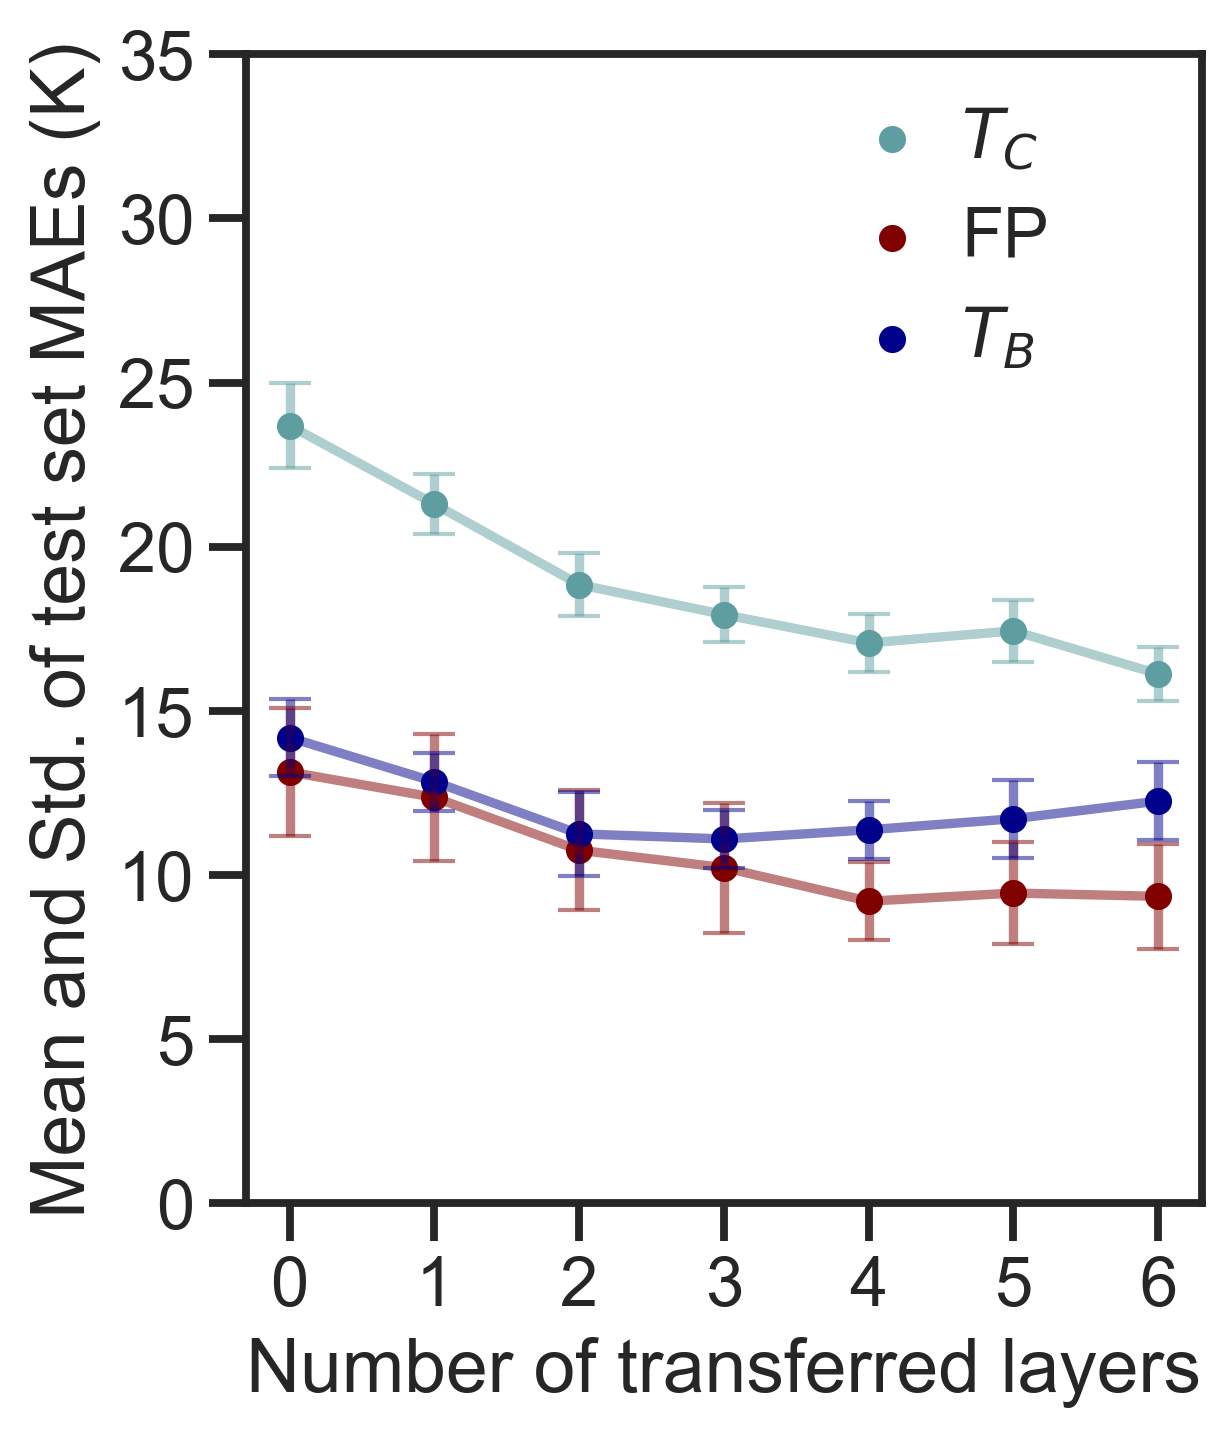

In [4]:
# except Cp and TM

fig,ax = plt.subplots()
fig.set_figheight(4.6)
fig.set_figwidth(4.2)
fig.tight_layout()
matplotlib.rcParams.update({'errorbar.capsize': 5})
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 5})


#ax.set_yticks([4.5,5.0,6.0,7.0,8.0])

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_ylim([0,35])

colors = ['maroon', 'cadetblue', 'darkblue', 'rebeccapurple']

ax.plot(range(0,7),Tc_results[0], color=colors[1], alpha = .5)
ax.scatter(range(0,7),Tc_results[0], color=colors[1], label = '$T_C$', s = 25)
ax.errorbar(range(0,7), Tc_results[0], Tc_results[1], ls = 'none', color=colors[1], alpha = .5)

ax.plot(range(0,7),fp_results[0], color=colors[0], alpha =.5)
ax.scatter(range(0,7),fp_results[0], color=colors[0], label = 'FP',  s = 25)
ax.errorbar(range(0,7), fp_results[0], fp_results[1], ls = 'none', color=colors[0], alpha =.5)

ax.plot(range(0,7),Tb_results[0], color=colors[2], alpha =.5)
ax.scatter(range(0,7),Tb_results[0], color=colors[2], label = '$T_B$',  s= 25)
ax.errorbar(range(0,7), Tb_results[0], Tb_results[1], ls = 'none', color=colors[2], alpha =.5)

#ax.plot(range(0,7),VP_results[0], color=colors[3], alpha = .5)
#ax.scatter(range(0,7),VP_results[0], color=colors[3], label = 'VP',  s = 25)
#ax.errorbar(range(0,7), VP_results[0], VP_results[1], ls = 'none', color=colors[3], alpha=.5)


#ax.scatter([4],fp_results[0][4], color=colors[0], s = 50, alpha=1.0, marker='s', zorder=100)
#ax.scatter([6],Tc_results[0][6], color=colors[1], s = 50, alpha=1.0, marker='s', zorder=100)
#ax.scatter([3],Tb_results[0][3], color=colors[2], s = 50, alpha=1.0, marker='s', zorder=100)
#ax.scatter([2],VP_results[0][2], color=colors[3], s = 50, alpha=1.0, marker='s', zorder=100)

ax.set_xlabel('Number of transferred layers')
ax.set_ylabel('Mean and Std. of test set MAEs (K)')
#ax.legend(bbox_to_anchor = (.7,.6), shadow=True, frameon=True)
ax.legend(loc='best', bbox_to_anchor=(.905,1.01), handletextpad=0.0)

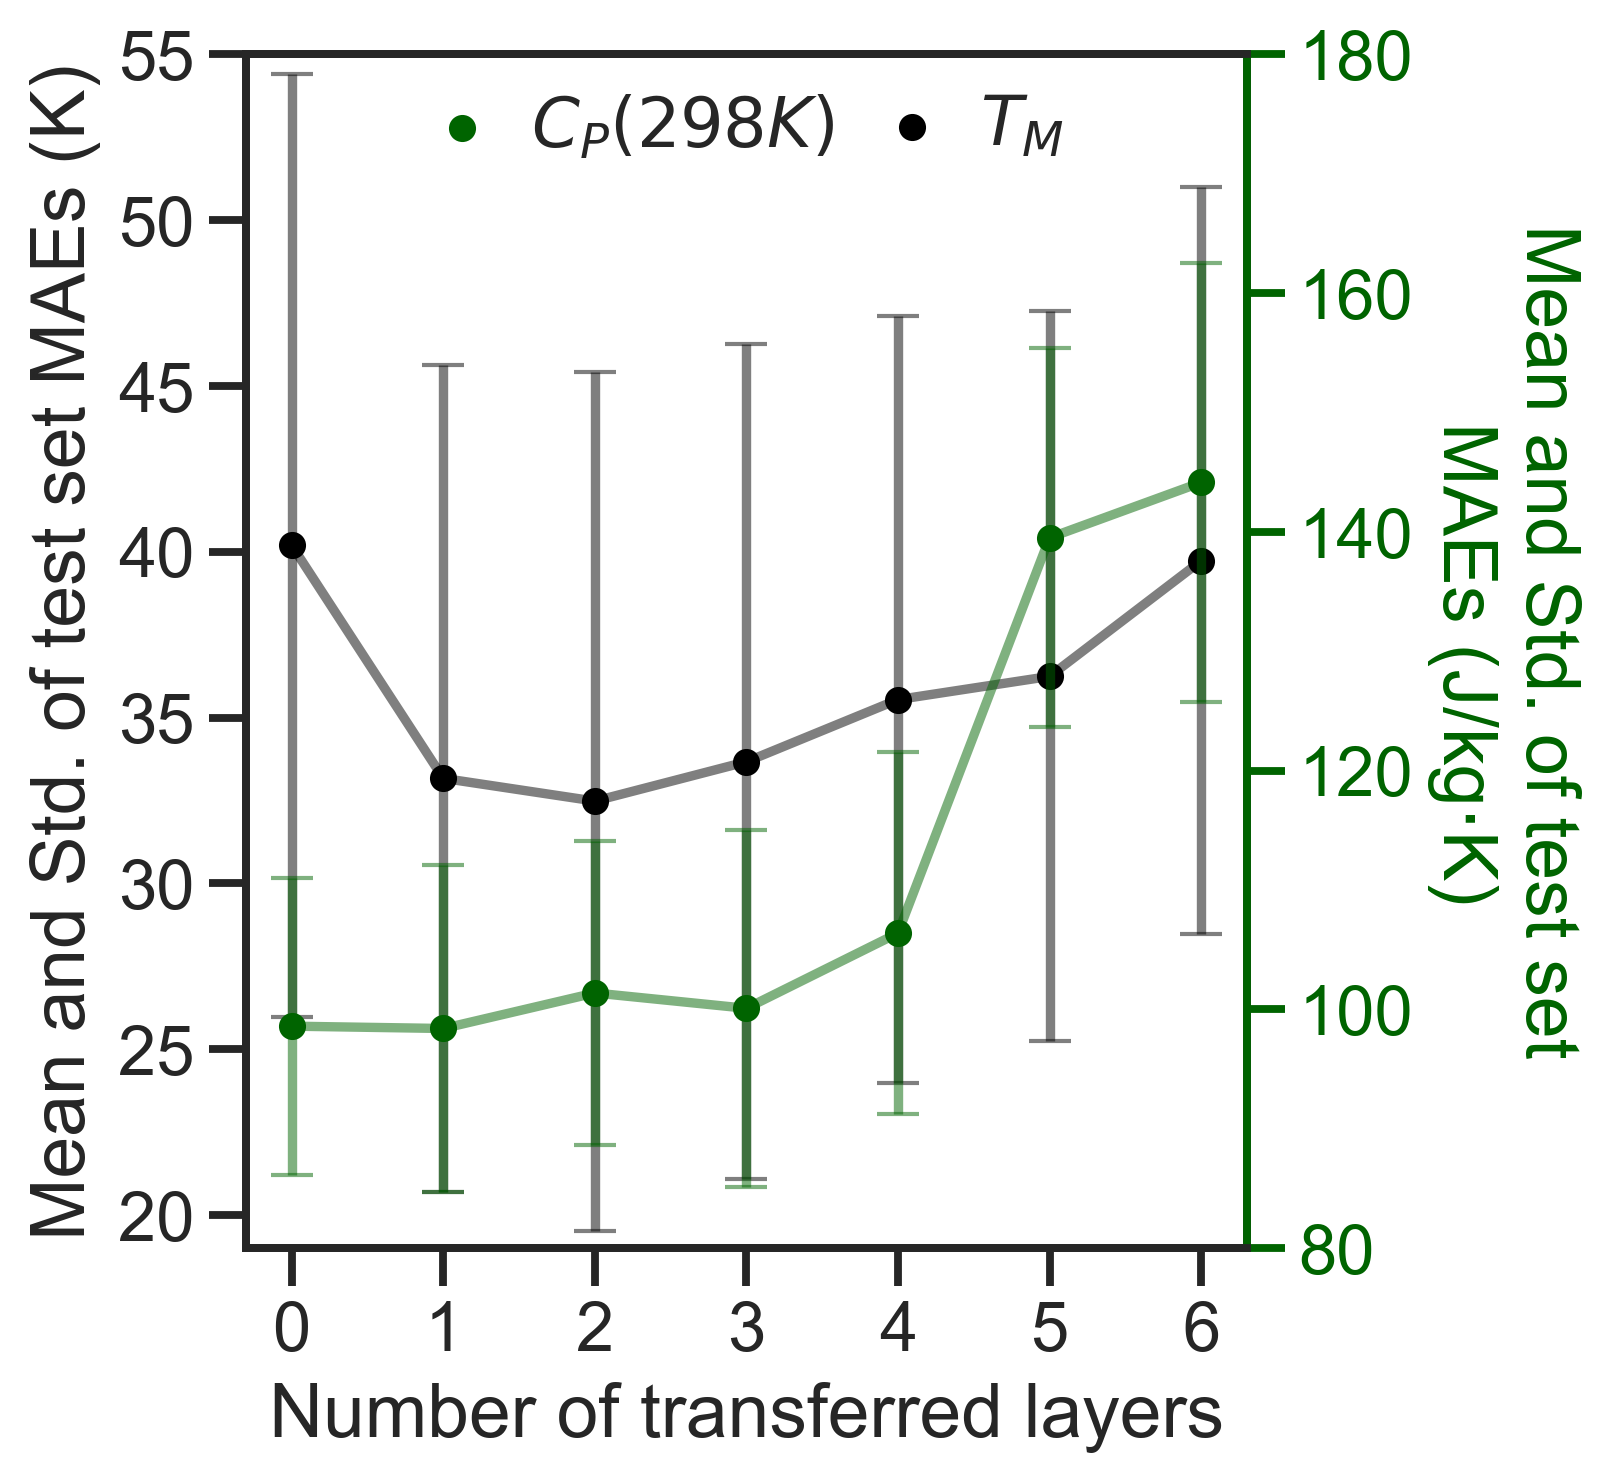

In [5]:
#all in one
fig,ax = plt.subplots()
fig.set_figheight(4.6)
fig.set_figwidth(4.2)
fig.tight_layout()
matplotlib.rcParams.update({'errorbar.capsize': 5})
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 5})

ax2 = ax.twinx()

#ax.set_yticks([4.5,5.0,6.0,7.0,8.0])

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_ylim([19,55])
ax2.set_ylim([80,180])
#ax2.set_yticks([80,90,100,110,120,130,140,150,160])

colors = ['black', 'darkgreen']

ax.plot(range(0,7),Tm_results[0], color=colors[0], alpha =.5)
ax.scatter(range(0,7),Tm_results[0], color=colors[0], label = '$T_M$',  s = 25)
ax.errorbar(range(0,7), Tm_results[0], Tm_results[1], ls = 'none', color=colors[0], alpha =.5)

ax2.plot(range(0,7),Cp_results[0], color=colors[1], alpha =.5)
ax2.scatter(range(0,7),Cp_results[0], color=colors[1], label = '$C_P (298K) $',  s = 25)
ax2.errorbar(range(0,7), Cp_results[0], Cp_results[1], ls = 'none', color=colors[1], alpha =.5)


ax.set_xlabel('Number of transferred layers')
ax.set_ylabel('Mean and Std. of test set MAEs (K)')
ax2.set_ylabel('Mean and Std. of test set \n MAEs (J/kg$\cdot$K)', rotation=270, labelpad=40)

ax2.yaxis.label.set_color('darkgreen')
ax2.tick_params(axis='y', colors='darkgreen')
ax2.spines['right'].set_color('darkgreen')

ax.legend(loc='best', bbox_to_anchor=(.88,1.02), handletextpad=0.0)
ax2.legend(loc='best', bbox_to_anchor=(.65,1.02), handletextpad=0.0)